In [5]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [6]:
TRAIN_DIR = "D:/dataset/archive/train"
TEST_DIR = "D:/dataset/archive/test"

In [7]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [8]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train)

                                                   image     label
0      D:/dataset/archive/train\angry\Training_101184...     angry
1      D:/dataset/archive/train\angry\Training_101204...     angry
2      D:/dataset/archive/train\angry\Training_101313...     angry
3      D:/dataset/archive/train\angry\Training_101615...     angry
4      D:/dataset/archive/train\angry\Training_102183...     angry
...                                                  ...       ...
28704  D:/dataset/archive/train\surprise\Training_999...  surprise
28705  D:/dataset/archive/train\surprise\Training_999...  surprise
28706  D:/dataset/archive/train\surprise\Training_999...  surprise
28707  D:/dataset/archive/train\surprise\Training_999...  surprise
28708  D:/dataset/archive/train\surprise\Training_999...  surprise

[28709 rows x 2 columns]


In [11]:
print(test)

                                                  image     label
0     D:/dataset/archive/test\angry\PrivateTest_1013...     angry
1     D:/dataset/archive/test\angry\PrivateTest_1030...     angry
2     D:/dataset/archive/test\angry\PrivateTest_1054...     angry
3     D:/dataset/archive/test\angry\PrivateTest_1059...     angry
4     D:/dataset/archive/test\angry\PrivateTest_1109...     angry
...                                                 ...       ...
7173  D:/dataset/archive/test\surprise\PublicTest_98...  surprise
7174  D:/dataset/archive/test\surprise\PublicTest_98...  surprise
7175  D:/dataset/archive/test\surprise\PublicTest_98...  surprise
7176  D:/dataset/archive/test\surprise\PublicTest_99...  surprise
7177  D:/dataset/archive/test\surprise\PublicTest_99...  surprise

[7178 rows x 2 columns]


In [12]:
from tqdm.notebook import tqdm

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [16]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

In [17]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [18]:
x_train = train_features/255.0
x_test = test_features/255.0

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [21]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [22]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [23]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [24]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [29]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [28]:
dot -V


NameError: name 'dot' is not defined

In [30]:
from tensorflow.keras.utils import plot_model


# Assuming 'model' is your Sequential model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [26]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


225/225 [==============================] - 295s 1s/step - loss: 1.8234 - accuracy: 0.2457 - val_loss: 1.8168 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 253s 1s/step - loss: 1.8069 - accuracy: 0.2517 - val_loss: 1.7828 - val_accuracy: 0.2572
Epoch 3/100
225/225 [==============================] - 262s 1s/step - loss: 1.7446 - accuracy: 0.2751 - val_loss: 1.6458 - val_accuracy: 0.3341
Epoch 4/100
225/225 [==============================] - 278s 1s/step - loss: 1.6192 - accuracy: 0.3562 - val_loss: 1.4731 - val_accuracy: 0.4263
Epoch 5/100
225/225 [==============================] - 291s 1s/step - loss: 1.5084 - accuracy: 0.4137 - val_loss: 1.3724 - val_accuracy: 0.4723
Epoch 6/100
225/225 [==============================] - 275s 1s/step - loss: 1.4380 - accuracy: 0.4459 - val_loss: 1.3287 - val_accuracy: 0.4841
Epoch 7/100
225/225 [==============================] - 303s 1s/step - loss: 1.3988 - accuracy: 0.4614 - val_loss: 1.3134 - val_accurac

In [50]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

c:\Users\Hyder\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
from keras.models import model_from_json

In [3]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [4]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [5]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1) 
    return feature/255.0

In [74]:
image = 'D:/dataset/archive/test/disgust/PrivateTest_89077668.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 [==============================] - 0s 111ms/step
model prediction is  disgust


1/1 [==============================] - 0s 42ms/step
Accuracy: 0.6354
Confusion Matrix:
[[ 477    5   77   72  135  169   23]
 [  29   56    5    2    7   10    2]
 [  94    3  369   56  149  244  109]
 [  36    0   27 1502  101   67   41]
 [  63    2   38   92  821  194   23]
 [ 105    2   96   93  259  670   22]
 [  19    1   39   48   37   21  666]]


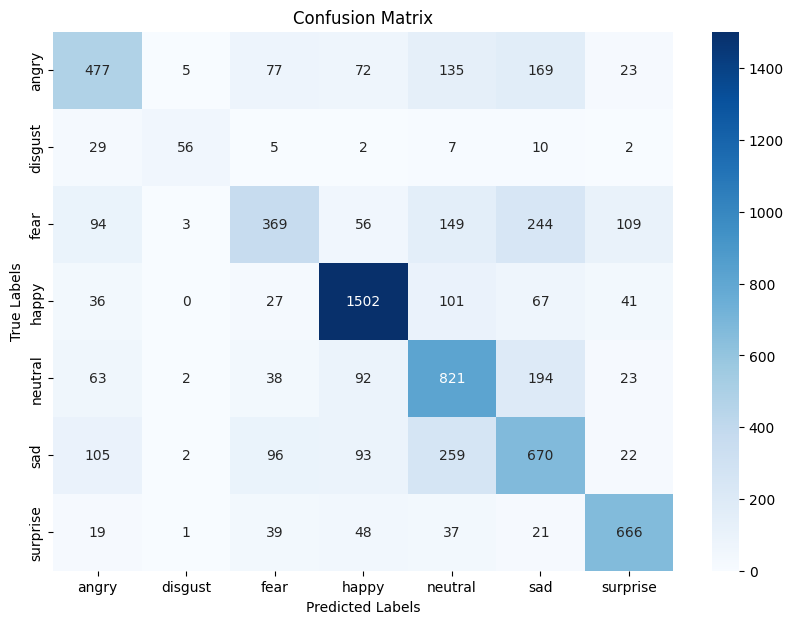

Classification Report:
              precision    recall  f1-score   support

       angry       0.58      0.50      0.54       958
     disgust       0.81      0.50      0.62       111
        fear       0.57      0.36      0.44      1024
       happy       0.81      0.85      0.83      1774
     neutral       0.54      0.67      0.60      1233
         sad       0.49      0.54      0.51      1247
    surprise       0.75      0.80      0.78       831

    accuracy                           0.64      7178
   macro avg       0.65      0.60      0.62      7178
weighted avg       0.63      0.64      0.63      7178



In [6]:
from keras.models import model_from_json
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import glob
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load model
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

# Preprocessing function for your images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(48, 48), color_mode="grayscale")
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Model expects batches of images, so expand dims
    img /= 255.0  # Normalize to [0,1]
    return img

# Labels
labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Encoder to convert labels to integers
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Directory containing test images organized by folder name matching the labels
test_dir = 'D:/dataset/archive/test'

true_labels = []
predicted_labels = []

# Iterate over all images in test directory organized by label
for label in labels:
    for image_path in glob.glob(os.path.join(test_dir, label, '*.jpg')):  # Adjust pattern if necessary
        img = preprocess_image(image_path)
        pred = model.predict(img)
        pred_label = labels[pred.argmax()]
        
        true_labels.append(label)
        predicted_labels.append(pred_label)
        
# Encode labels
true_labels_encoded = label_encoder.transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)

# Metrics
accuracy = accuracy_score(true_labels_encoded, predicted_labels_encoded)
print(f'Accuracy: {accuracy:.4f}')

conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(true_labels_encoded, predicted_labels_encoded, target_names=label_encoder.classes_))


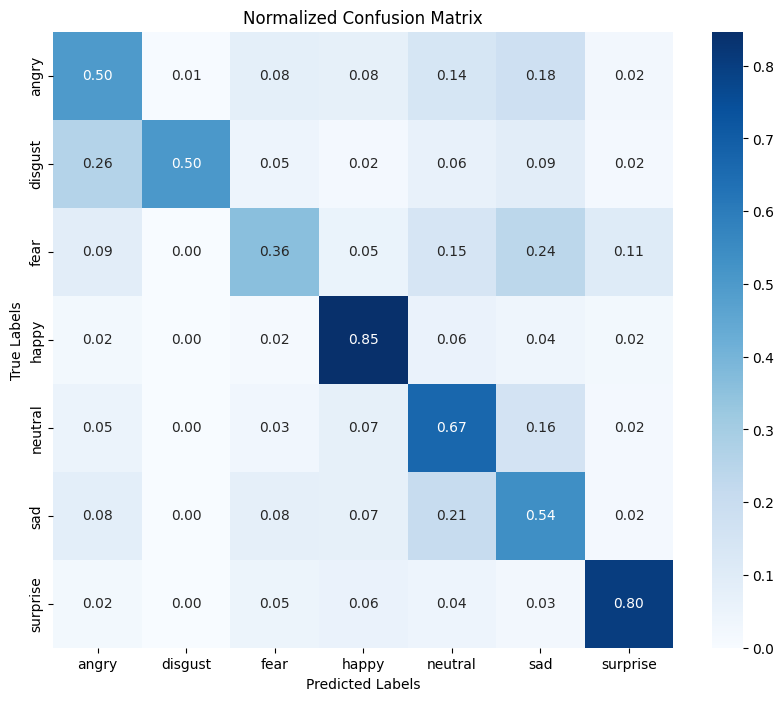

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Provided confusion matrix data
conf_matrix = np.array([
    [477, 5, 77, 72, 135, 169, 23],
    [29, 56, 5, 2, 7, 10, 2],
    [94, 3, 369, 56, 149, 244, 109],
    [36, 0, 27, 1502, 101, 67, 41],
    [63, 2, 38, 92, 821, 194, 23],
    [105, 2, 96, 93, 259, 670, 22],
    [19, 1, 39, 48, 37, 21, 666]
])

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues',xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



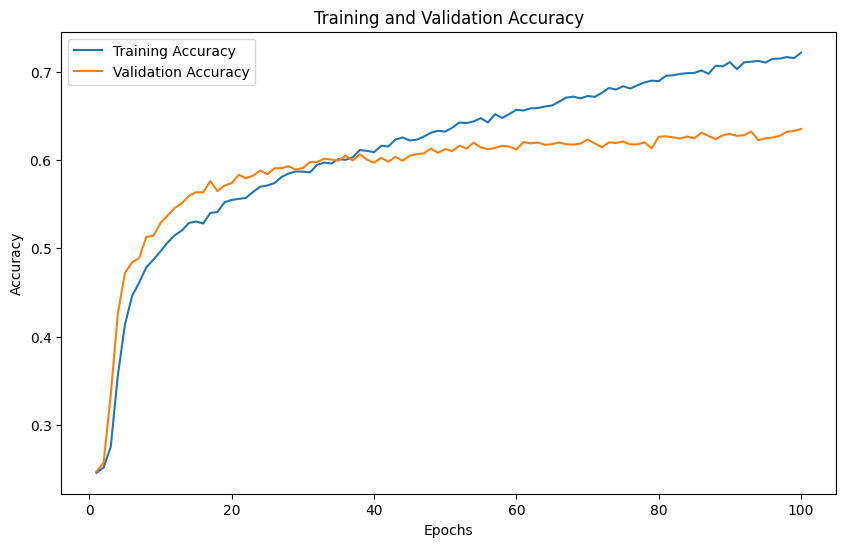

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, 101)
# Training and validation accuracy values
accuracy = [0.2457, 0.2517, 0.2751, 0.3562, 0.4137, 0.4459, 0.4614, 0.4785, 0.4872, 0.4968, 
            0.5067, 0.5148, 0.5203, 0.5289, 0.5304, 0.5282, 0.5402, 0.5412, 0.5524, 0.5550, 
            0.5561, 0.5573, 0.5640, 0.5699, 0.5713, 0.5740, 0.5809, 0.5849, 0.5872, 0.5870, 
            0.5862, 0.5947, 0.5973, 0.5962, 0.6012, 0.6004, 0.6032, 0.6115, 0.6106, 0.6090, 
            0.6163, 0.6155, 0.6233, 0.6257, 0.6224, 0.6232, 0.6267, 0.6311, 0.6333, 0.6324, 
            0.6369, 0.6427, 0.6421, 0.6439, 0.6476, 0.6427, 0.6521, 0.6479, 0.6522, 0.6571, 
            0.6563, 0.6587, 0.6591, 0.6608, 0.6620, 0.6663, 0.6709, 0.6720, 0.6701, 0.6727, 
            0.6718, 0.6763, 0.6818, 0.6801, 0.6839, 0.6812, 0.6848, 0.6881, 0.6901, 0.6896, 
            0.6956, 0.6962, 0.6978, 0.6986, 0.6989, 0.7017, 0.6979, 0.7070, 0.7064, 0.7112, 
            0.7031, 0.7109, 0.7116, 0.7125, 0.7106, 0.7149, 0.7151, 0.7169, 0.7156, 0.7218]
val_accuracy = [0.2471, 0.2572, 0.3341, 0.4263, 0.4723, 0.4841, 0.4891, 0.5130, 0.5143, 0.5288, 
                0.5375, 0.5458, 0.5511, 0.5596, 0.5637, 0.5635, 0.5763, 0.5649, 0.5712, 0.5740, 
                0.5834, 0.5795, 0.5825, 0.5883, 0.5840, 0.5908, 0.5910, 0.5932, 0.5893, 0.5911, 
                0.5979, 0.5979, 0.6016, 0.6007, 0.5996, 0.6050, 0.5996, 0.6067, 0.6007, 0.5971, 
                0.6027, 0.5982, 0.6038, 0.5993, 0.6050, 0.6069, 0.6077, 0.6131, 0.6084, 0.6126, 
                0.6102, 0.6165, 0.6130, 0.6198, 0.6144, 0.6124, 0.6138, 0.6162, 0.6154, 0.6121,
                0.6205, 0.6191, 0.6201, 0.6174, 0.6181, 0.6201, 0.6180, 0.6177, 0.6188, 0.6234, 
                0.6191, 0.6147, 0.6201, 0.6195, 0.6212, 0.6179, 0.6180, 0.6202, 0.6135, 0.6265,
                0.6271, 0.6259, 0.6245, 0.6268, 0.6247, 0.6312, 0.6275, 0.6239, 0.6282, 0.6298, 
                0.6276, 0.6282, 0.6326, 0.6227, 0.6248, 0.6257, 0.6276, 0.6322, 0.6330, 0.6354]

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

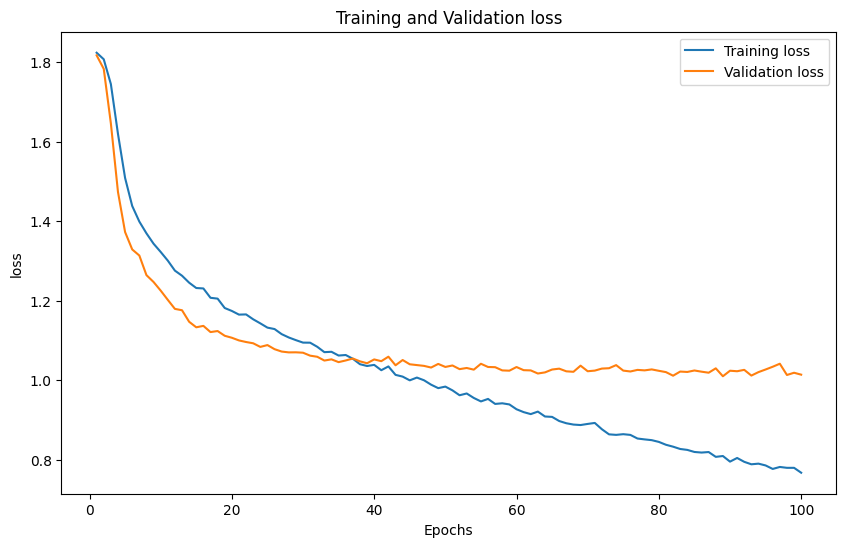

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, 101)

loss = [
    1.8234, 1.8069, 1.7446, 1.6192, 1.5084, 1.4380, 1.3988, 1.3692, 1.3431, 1.3224,
    1.3006, 1.2754, 1.2626, 1.2451, 1.2317, 1.2306, 1.2071, 1.2050, 1.1814, 1.1740,
    1.1648, 1.1653, 1.1530, 1.1428, 1.1321, 1.1285, 1.1157, 1.1073, 1.1006, 1.0944,
    1.0942, 1.0839, 1.0704, 1.0713, 1.0619, 1.0632, 1.0538, 1.0401, 1.0356, 1.0384,
    1.0250, 1.0345, 1.0133, 1.0089, 0.9995, 1.0065, 0.9997, 0.9886, 0.9799, 0.9838,
    0.9743, 0.9620, 0.9665, 0.9552, 0.9465, 0.9528, 0.9402, 0.9418, 0.9389, 0.9268,
    0.9196, 0.9146, 0.9209, 0.9086, 0.9076, 0.8972, 0.8916, 0.8883, 0.8871, 0.8899,
    0.8924, 0.8765, 0.8637, 0.8624, 0.8641, 0.8623, 0.8532, 0.8510, 0.8491, 0.8447,
    0.8375, 0.8327, 0.8269, 0.8246, 0.8194, 0.8179, 0.8192, 0.8071, 0.8092, 0.7951,
    0.8043, 0.7946, 0.7884, 0.7900, 0.7855, 0.7767, 0.7817, 0.7795, 0.7795, 0.7672
]

val_loss = [
    1.8168, 1.7828, 1.6458, 1.4731, 1.3724, 1.3287, 1.3134, 1.2641, 1.2468, 1.2252,
    1.2019, 1.1792, 1.1758, 1.1468, 1.1329, 1.1365, 1.1209, 1.1235, 1.1116, 1.1066,
    1.0999, 1.0959, 1.0927, 1.0836, 1.0882, 1.0779, 1.0719, 1.0698, 1.0700, 1.0690,
    1.0616, 1.0588, 1.0493, 1.0523, 1.0453, 1.0495, 1.0544, 1.0473, 1.0425, 1.0521,
    1.0477, 1.0590, 1.0374, 1.0506, 1.0399, 1.0379, 1.0359, 1.0317, 1.0408, 1.0332,
    1.0369, 1.0277, 1.0306, 1.0264, 1.0412, 1.0331, 1.0326, 1.0245, 1.0238, 1.0330,
    1.0251, 1.0245, 1.0167, 1.0195, 1.0267, 1.0289, 1.0222, 1.0210, 1.0364, 1.0224,
    1.0240, 1.0291, 1.0300, 1.0378, 1.0240, 1.0218, 1.0258, 1.0246, 1.0270, 1.0235,
    1.0202, 1.0112, 1.0216, 1.0206, 1.0243, 1.0213, 1.0187, 1.0297, 1.0098, 1.0237,
    1.0224, 1.0259, 1.0115, 1.0202, 1.0268, 1.0337, 1.0413, 1.0130, 1.0186, 1.0138
]


plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
